#  Lab 7
Name:Bochuan Wu, Tianqi Huang,Keting Li, Tianchu Wang

#  Preprocessing

In [232]:
from PIL import ImageFile
import h5py


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.io import imread_collection
from keras.utils import to_categorical

In [233]:
import pandas as pd
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/16703/Desktop/letters.csv")
files = data['file']
letters = data['letter']
backgrounds = data['background']
label=data['label']

In [234]:
# Read the h5 file
f = h5py.File('C:/Users/16703/Desktop/LetterColorImages.h5', 'r')

# List all groups
keys = list(f.keys())
keys

['backgrounds', 'images', 'labels']

In [235]:
# Create tensors and targets
tensors = np.array(f[keys[1]])#image
targets = np.array(f[keys[2]])#lable
print ('Tensor shape:', tensors.shape)
print ('Target shape', targets.shape)
print (32*32) # the size of the images are the size of the feature vectors
y = targets
X = tensors

Tensor shape: (1650, 32, 32, 3)
Target shape (1650,)
1024


In [236]:
print(label)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
1620    33
1621    33
1622    33
1623    33
1624    33
1625    33
1626    33
1627    33
1628    33
1629    33
1630    33
1631    33
1632    33
1633    33
1634    33
1635    33
1636    33
1637    33
1638    33
1639    33
1640    33
1641    33
1642    33
1643    33
1644    33
1645    33
1646    33
1647    33
1648    33
1649    33
Name: label, Length: 1650, dtype: int64


## dataset consists of 1650 32x32x3 colour images in 33 classes

In [237]:
# Store r g b and compute gray
Xr = X[:, :, :, 0].reshape(1650, 1024)
Xg = X[:, :, :, 1].reshape(1650, 1024)
Xb = X[:, :, :, 2].reshape(1650, 1024)

Xgray = np.empty((1650, 1024))

for i in range(len(X)):
    Xgray[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY).ravel()
Xgray = Xgray.astype(np.uint8)

# Xgray = 0.2989 * Xr + 0.5870 * Xg + 0.1140 * Xb

print(Xr.shape)
print(Xg.shape)
print(Xb.shape)
print(Xgray.shape)

(1650, 1024)
(1650, 1024)
(1650, 1024)
(1650, 1024)


In [238]:
print(Y)


[ 1  1  1 ..., 33 33 33]


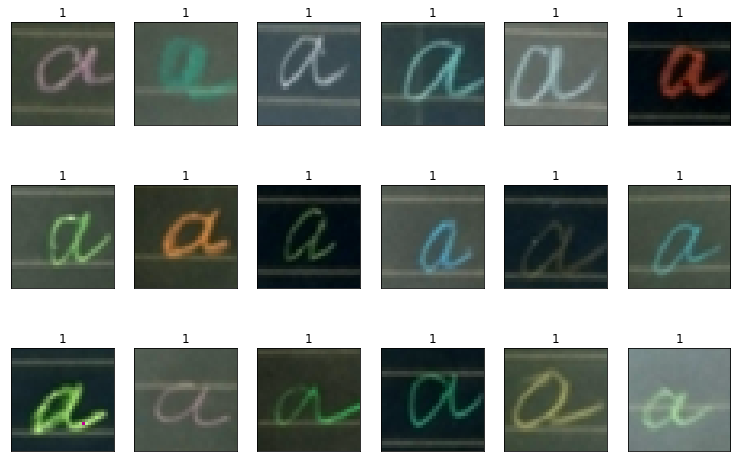

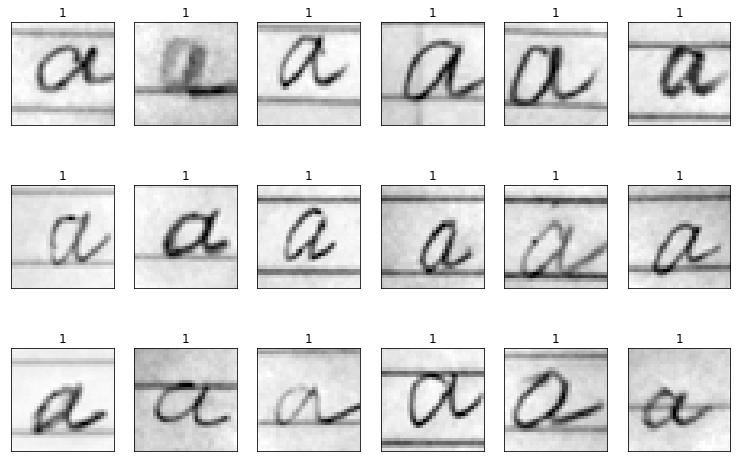

In [239]:
h, w = 32, 32
# visualizing several images
# using the function in 04. Dimension Reduction and Images from https://github.com/eclarson/MachineLearningNotebooks
def plot_gallery(images, titles, h, w, n_row=3, n_col=6, cmap=plt.cm.gist_gray):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=cmap)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
def plot_gallery_color(images, titles, h, w, n_row=3, n_col=6, cmap=None):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
        
plot_gallery_color(X, Y, h, w)
plot_gallery(Xgray, Y, h, w)

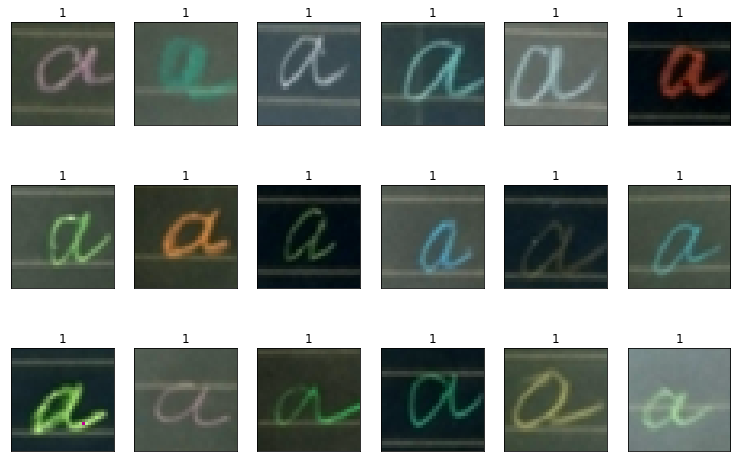

In [240]:
# visualize a specific class
idx = Y==1
plot_gallery_color(X[idx], Y[idx], h, w)

In [241]:
# normalize values to -0.5 to 0.5
if X.max()==255: 
    X = X/255 - 0.5
    
if Xgray.max()==255: 
    Xgray = Xgray/255 - 0.5
    
print(X.min(), X.max())
print(Xgray.min(), Xgray.max())

print(X.shape)
print(Xgray.shape)

-0.5 0.5
4 254
(1650, 32, 32, 3)
(1650, 1024)


In [242]:
# import pandas as pd
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data2 = pd.read_csv("C:/Users/16703/Desktop/letters2.csv")
files2 = data2['file']
letters2 = data2['letter']
backgrounds2 = data2['background']
label2=data2['label']
f2 = h5py.File('C:/Users/16703/Desktop/LetterColorImages2.h5', 'r')

# List all groups
keys2 = list(f2.keys())
keys2
tensors2 = np.array(f2[keys2[1]])#image
targets2 = np.array(f2[keys2[2]])#lable

print ('Tensor shape:', tensors2.shape)
print ('Target shape', targets2.shape)
print (32*32) # the size of the images are the size of the feature vectors


Tensor shape: (5940, 32, 32, 3)
Target shape (5940,)
1024


# 2. Modeling
## 2.1 Create a CNN using Keras on grayscale image

In [243]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
print(keras.__version__)

labels={}.fromkeys(Y).keys() 


NUM_CLASSES = len(list(labels))
print(NUM_CLASSES)
print(X_train.shape)


2.1.3
33
(1320, 1024)


In [244]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(np.expand_dims(X_test, axis=1)), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+str(acc_mlp))

In [268]:
from sklearn.model_selection import train_test_split
# first, try gray images
# perform simple 80/20 split just for convient testing
X_train_color, X_test_color, X_train, X_test, y_train, y_test = train_test_split(X, Xgray, Y-1, test_size=0.2)

# reshape y to be used by Keras
y_ohe = keras.utils.to_categorical(Y-1, NUM_CLASSES)
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
y_test_ohe.shape


(330, 33)

# create a MLP sample


In [270]:
%%time

# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=33, 
        shuffle=True, validation_split=0.2)

Train on 1056 samples, validate on 264 samples
Epoch 1/33
1056/1056 [==============================] - 1s 525us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 2/33
1056/1056 [==============================] - 0s 75us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 3/33
1056/1056 [==============================] - 0s 89us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 4/33
1056/1056 [==============================] - 0s 70us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 5/33
1056/1056 [==============================] - 0s 74us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 6/33
1056/1056 [==============================] - 0s 78us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 7/33
1056/1056 [==============================] - 0s 73us/step - loss: 0.0585 - acc: 0.0341 - val_loss: 0.0592 - val_acc: 0.0227
Epoch 8

## create a CNN model 

In [271]:
%%time
# Baseline: 2 conv layers and two output layers

img_wh = 32 # width and height of a image


cnn1 = Sequential()
cnn1.add(Reshape((1,img_wh, img_wh), input_shape=(1,img_wh**2)))

num_filt_layers = [24, 24]
for num_filters in num_filt_layers:
    cnn1.add(Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same'))
    cnn1.add(Activation('relu'))
    cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    

# add one layer on flattened output
cnn1.add(Flatten())
cnn1.add(Dense(100, activation='relu'))
cnn1.add(Dense(100, activation='relu'))
cnn1.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn1.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn1.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=15, 
        shuffle=True, validation_split=0.2, verbose=1)


Train on 1056 samples, validate on 264 samples
Epoch 1/15
1056/1056 [==============================] - 1s 818us/step - loss: 0.0589 - acc: 0.0265 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 2/15
1056/1056 [==============================] - 0s 275us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 3/15
1056/1056 [==============================] - 0s 280us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 4/15
1056/1056 [==============================] - 0s 277us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 5/15
1056/1056 [==============================] - 0s 272us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 6/15
1056/1056 [==============================] - 0s 273us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
Epoch 7/15
1056/1056 [==============================] - 0s 269us/step - loss: 0.0589 - acc: 0.0275 - val_loss: 0.0583 - val_acc: 0.0379
E

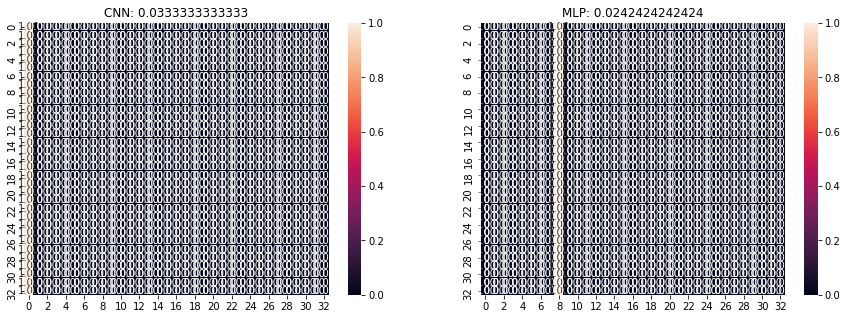

In [272]:
compare_mlp_cnn(cnn1,mlp,X_test,y_test)

## 2.2 Try other CNN architectures

In [274]:
%%time
# Copy TensorFlow Architecture from 
#   Deep MNIST for experts
#   https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html

# Manipulated to mirror parts of this network:
#   http://ankivil.com/mnist-database-and-simple-classification-networks/

cnn2 = Sequential()
cnn2.add(Reshape((1,img_wh, img_wh), input_shape=(1,img_wh**2)))

num_filt_layers = [32, 64]
for num_filters in num_filt_layers:
    cnn2.add(Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu')) # more compact syntax

    # max pooling
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))
cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn2.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=64, epochs=15, 
        shuffle=True, verbose=1,
        validation_data=(np.expand_dims(X_test, axis=1),y_test_ohe))


Train on 1320 samples, validate on 330 samples
Epoch 1/15
1320/1320 [==============================] - 1s 952us/step - loss: 15.5650 - acc: 0.0311 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 2/15
1320/1320 [==============================] - 1s 532us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 3/15
1320/1320 [==============================] - 1s 583us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 4/15
1320/1320 [==============================] - 1s 528us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 5/15
1320/1320 [==============================] - 1s 499us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 6/15
1320/1320 [==============================] - 1s 494us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val_acc: 0.0394
Epoch 7/15
1320/1320 [==============================] - 1s 428us/step - loss: 15.6663 - acc: 0.0280 - val_loss: 15.4831 - val

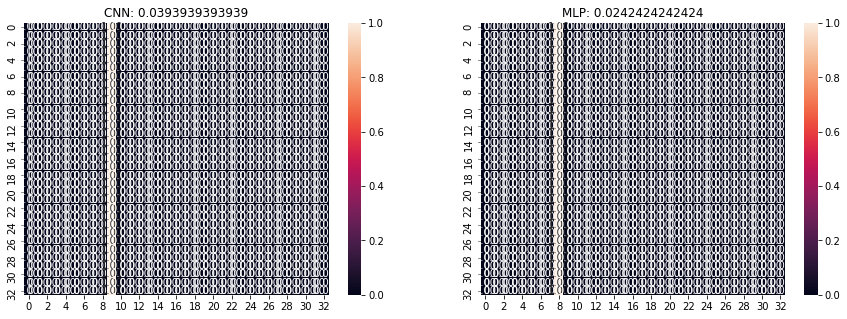

In [275]:
compare_mlp_cnn(cnn2,mlp,X_test,y_test)

## try another architecture

In [276]:
# Copy architecture from 
# Keras Examples
# https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

# useing color images
print(X_train_color.shape)
print(X_test_color.shape)

(1320, 32, 32, 3)
(330, 32, 32, 3)


In [277]:
# CNN: 32, 32, maxpool, 64, 64, maxpool
# followed by a MLP with 512, 10
model = Sequential()

model.add(Conv2D(32, (3, 3), 
                 padding='same',
                 input_shape=X_train_color.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train_color, y_train_ohe,
          batch_size=32,
          epochs=50,
          validation_data=(X_test_color, y_test_ohe),
          shuffle=True,
          verbose=1)

Train on 1320 samples, validate on 330 samples
Epoch 1/50
1320/1320 [==============================] - 9s 7ms/step - loss: 3.4950 - acc: 0.0303 - val_loss: 3.4917 - val_acc: 0.0303
Epoch 2/50
1320/1320 [==============================] - 9s 7ms/step - loss: 3.4867 - acc: 0.0402 - val_loss: 3.4874 - val_acc: 0.0515
Epoch 3/50
1320/1320 [==============================] - 9s 7ms/step - loss: 3.4753 - acc: 0.0394 - val_loss: 3.4728 - val_acc: 0.0485
Epoch 4/50
1320/1320 [==============================] - 7s 5ms/step - loss: 3.4588 - acc: 0.0462 - val_loss: 3.4463 - val_acc: 0.0485
Epoch 5/50
1320/1320 [==============================] - 8s 6ms/step - loss: 3.4364 - acc: 0.0439 - val_loss: 3.4086 - val_acc: 0.0485
Epoch 6/50
1320/1320 [==============================] - 7s 5ms/step - loss: 3.4079 - acc: 0.0447 - val_loss: 3.3788 - val_acc: 0.0727
Epoch 7/50
1320/1320 [==============================] - 7s 5ms/step - loss: 3.3895 - acc: 0.0614 - val_loss: 3.3604 - val_acc: 0.0727
Epoch 8/50
1320

In [278]:
# save model, training took too much time
import os

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_model_01.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\16703\Desktop\saved_models\keras_cifar10_model_01.h5 


In [279]:
from keras.models import load_model

model = load_model(model_path)

Text(0.5,1,'CNN: 0.357575757576')

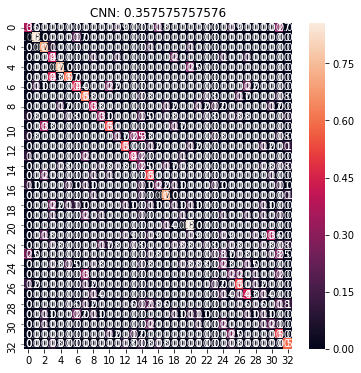

In [280]:
from keras.models import load_model
model = load_model(model_path)

yhat_cnn = np.argmax(model.predict(X_test_color), axis=1)
acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
                     
plt.figure(figsize=(6,6))
cm = mt.confusion_matrix(y_test,yhat_cnn)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2f')
plt.title('CNN: '+str(acc_cnn))